In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
URL = "https://raw.githubusercontent.com/arewadataScience/ArewaDS-Machine-Learning/main/data/honey.csv"
df = pd.read_csv(URL)

In [5]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


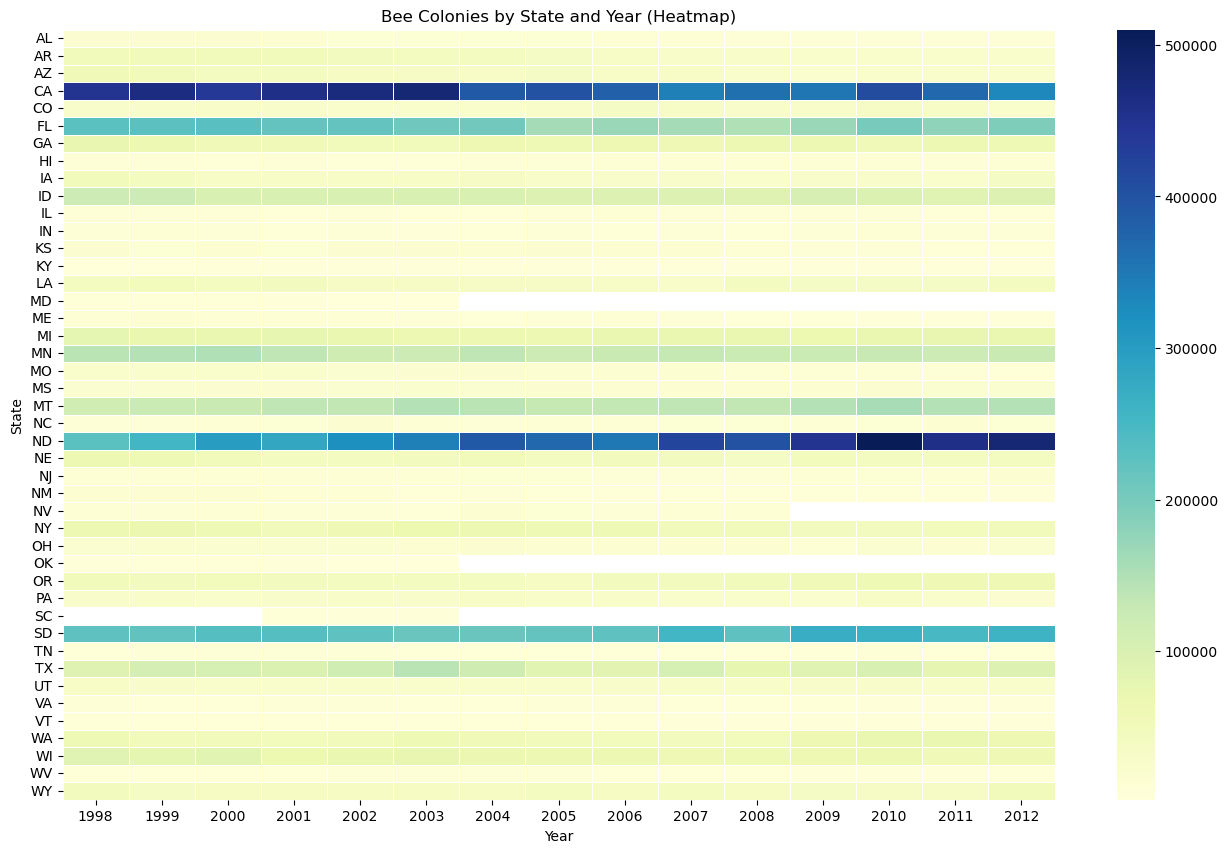

In [9]:
# Heatmap: Bee colonies by state and year
pivot = df.pivot_table(index='state', columns='year', values='numcol', aggfunc='sum')
plt.figure(figsize=(16,10))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Bee Colonies by State and Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

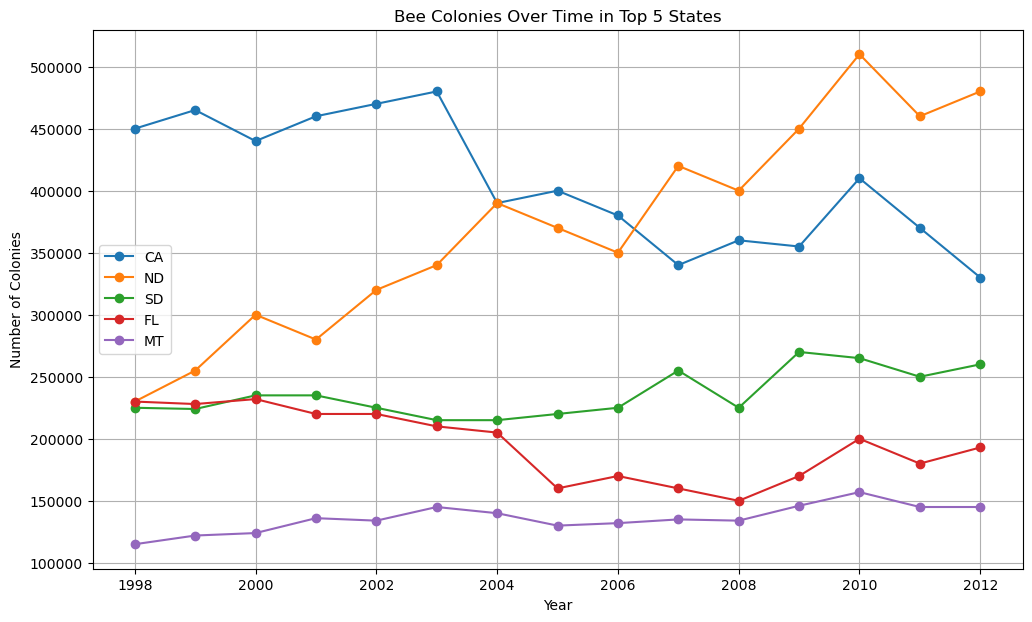

In [11]:
# Plot bee colonies for selected states over time
top_states = df.groupby('state')['numcol'].sum().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(12,7))
for state in top_states:
    state_data = df[df['state'] == state].groupby('year')['numcol'].sum().reset_index()
    plt.plot(state_data['year'], state_data['numcol'], marker='o', label=state)
plt.title('Bee Colonies Over Time in Top 5 States')
plt.xlabel('Year')
plt.ylabel('Number of Colonies')
plt.legend()
plt.grid(True)
plt.show()

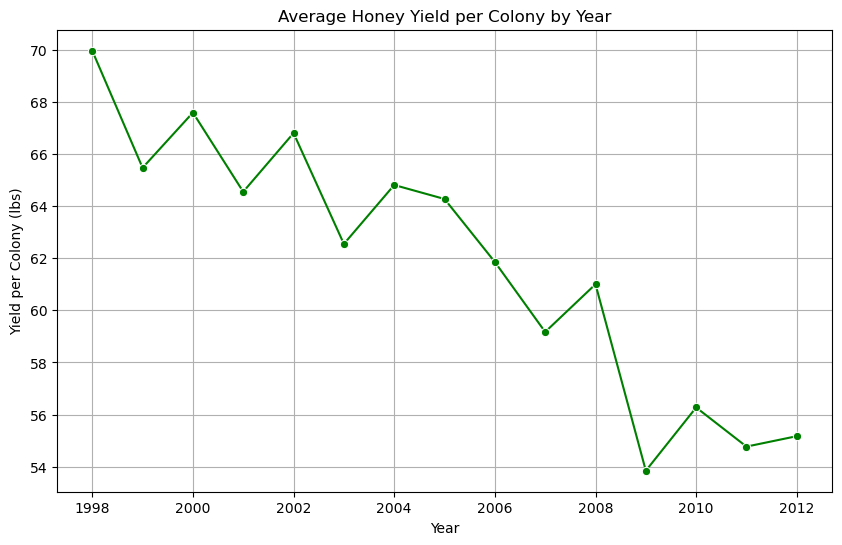

In [15]:
# Average honey yield per colony by year
yield_by_year = df.groupby('year')['yieldpercol'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=yield_by_year, x='year', y='yieldpercol', marker='o', color='green')
plt.title('Average Honey Yield per Colony by Year')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (lbs)')
plt.grid(True)
plt.show()

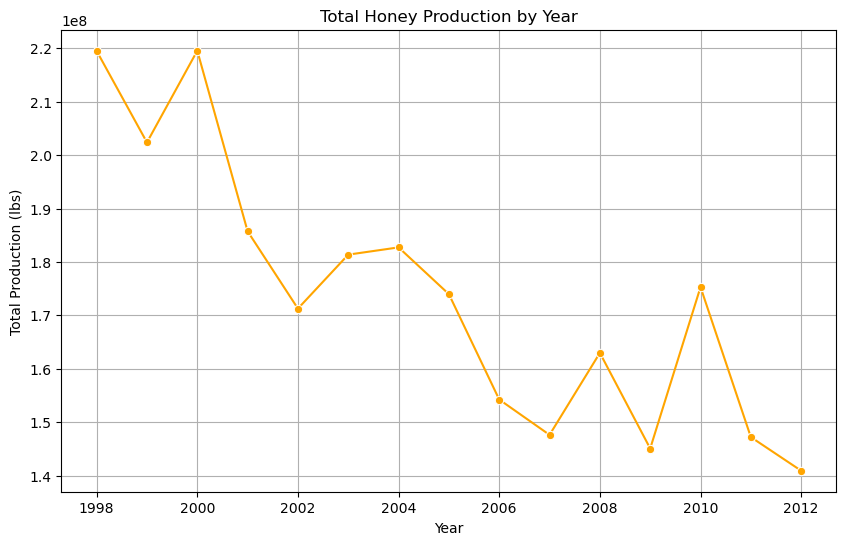

In [16]:
# Total honey production by year
prod_by_year = df.groupby('year')['totalprod'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=prod_by_year, x='year', y='totalprod', marker='o', color='orange')
plt.title('Total Honey Production by Year')
plt.xlabel('Year')
plt.ylabel('Total Production (lbs)')
plt.grid(True)
plt.show()

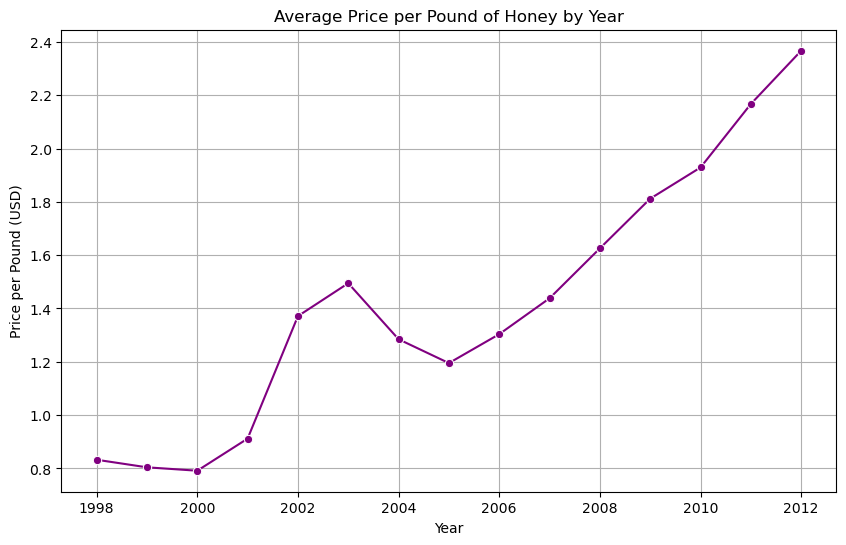

In [17]:
# Average price per pound of honey by year
price_by_year = df.groupby('year')['priceperlb'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=price_by_year, x='year', y='priceperlb', marker='o', color='purple')
plt.title('Average Price per Pound of Honey by Year')
plt.xlabel('Year')
plt.ylabel('Price per Pound (USD)')
plt.grid(True)
plt.show()

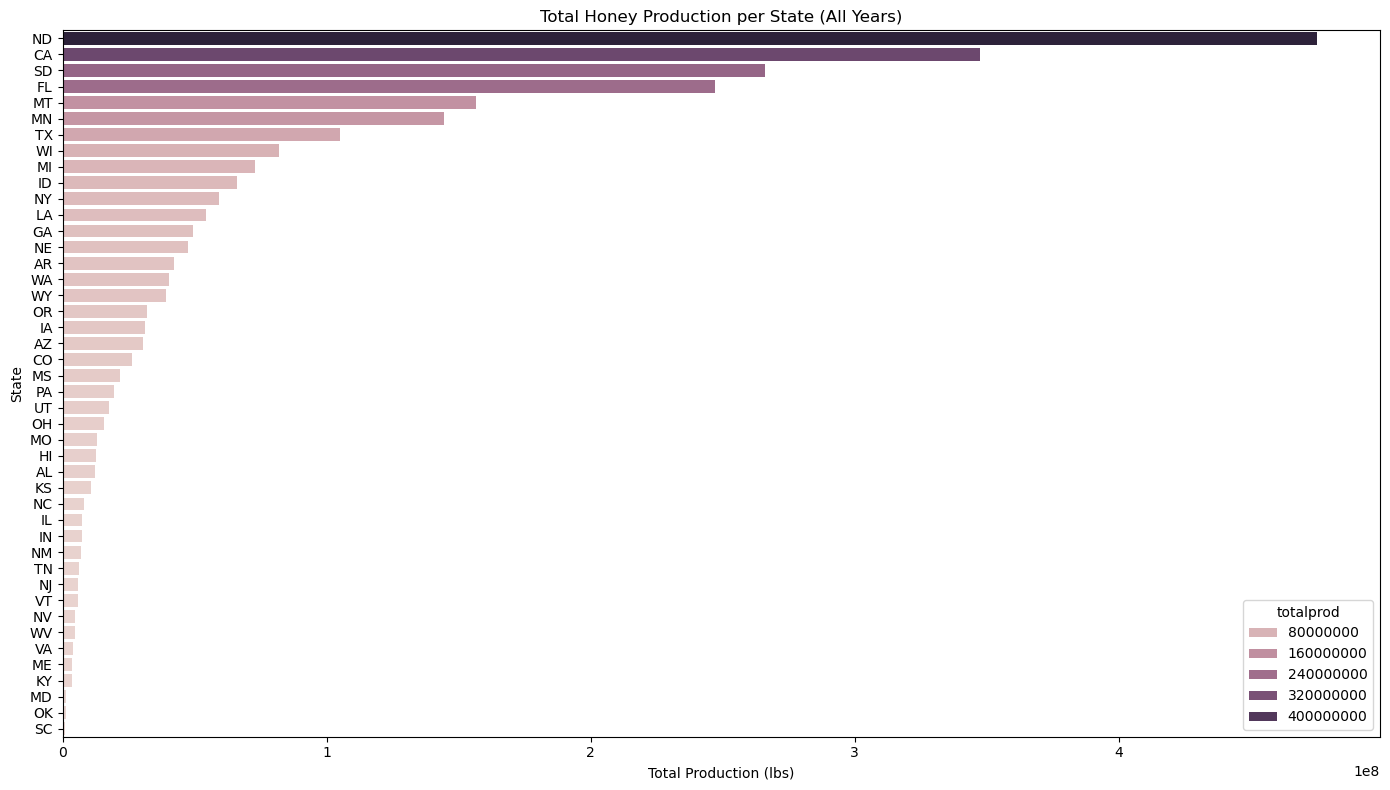

In [19]:
# Total honey production per state (summed across all years)
prod_by_state = df.groupby('state')['totalprod'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=prod_by_state, x='totalprod', y='state', hue='totalprod')
plt.title('Total Honey Production per State (All Years)')
plt.xlabel('Total Production (lbs)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

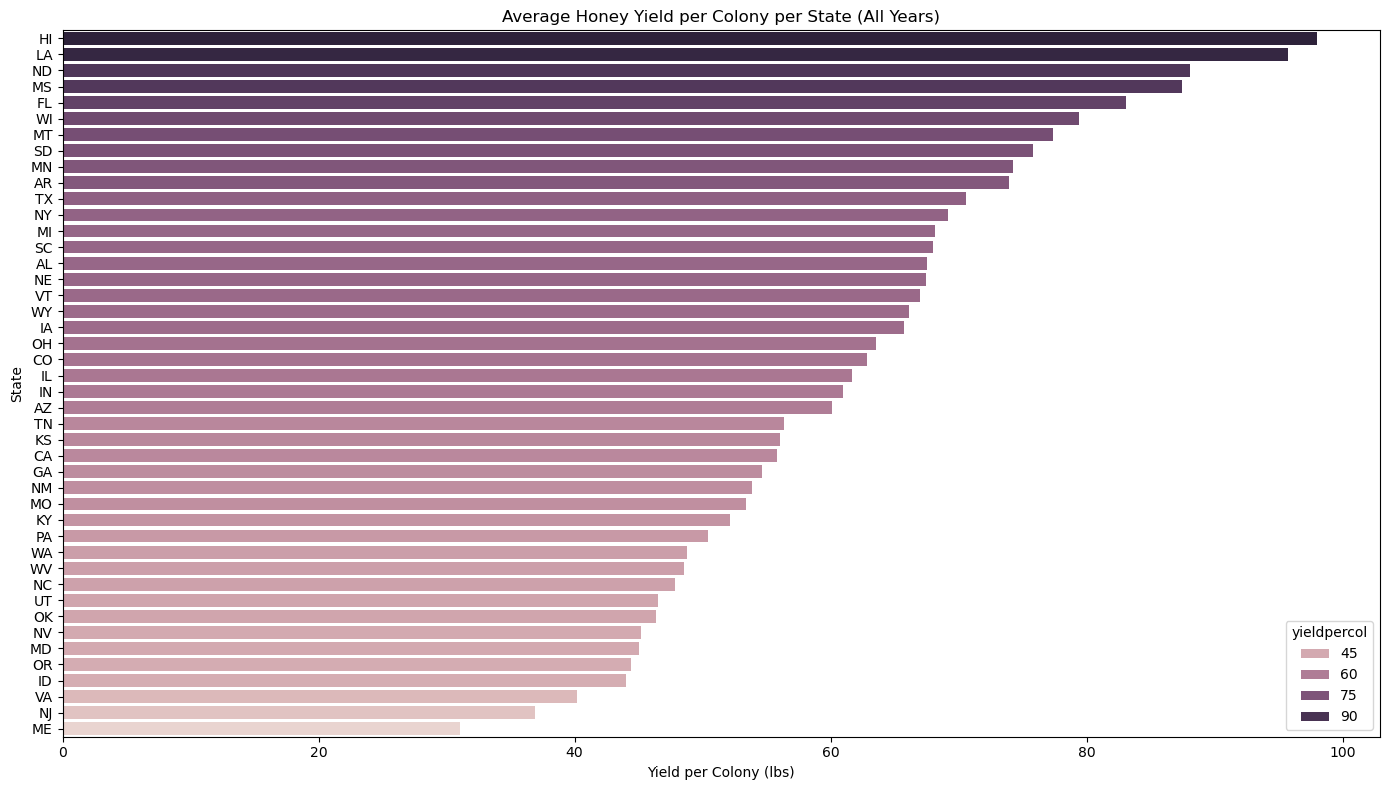

In [21]:
# Average honey yield per colony per state (averaged across all years)
yield_by_state = df.groupby('state')['yieldpercol'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=yield_by_state, x='yieldpercol', y='state', hue='yieldpercol')
plt.title('Average Honey Yield per Colony per State (All Years)')
plt.xlabel('Yield per Colony (lbs)')
plt.ylabel('State')
plt.tight_layout()
plt.show()